# Figure 6 - ENM #

We here construct the elastic network model, calculate C2-C2 fluctuations  and compare with experimental SHAPE data. 


In [2]:
%matplotlib inline
# import barnaba
import barnaba.enm as enm
import numpy as np

# fetch PDBs from rcsb.org. Many of them will be used for figure 7.
flist=["1C2X.pdb","2GDI.pdb","3DIG.pdb","1Y26.pdb","2A64.pdb","1NBS.pdb",\
       "1Y0Q.pdb","1CSL.pdb","1JZV.pdb"]

import os
for pdb in flist:
    cmd = "curl https://files.rcsb.org/download/%s > %s" % (pdb,pdb)
    os.system(cmd)
    
    
# Calculate ENM 
enm_1C2X=enm.Enm("1C2X.pdb",cutoff=0.7,sele_atoms="AA",sparse=True)
enm_3DIG=enm.Enm("3DIG.pdb",cutoff=0.7,sele_atoms="AA",sparse=True)

# calculate C2-C2 fluctuations
fluc_C2_1C2X,res_list_1C2X=enm_1C2X.c2_fluctuations()
fluc_C2_3DIG,res_list_3DIG=enm_3DIG.c2_fluctuations()

# read experimental data
shape_1C2X=np.loadtxt('1C2X.shape',usecols=[2]).clip(0)
shape_3DIG=np.loadtxt('3DIG.shape',usecols=[2]).clip(0)

/Users/sandrobottaro/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


# Read  (2570, 3) coordinates
# Using sparse matrix diagonalization
# Read  (3809, 3) coordinates
# Using sparse matrix diagonalization


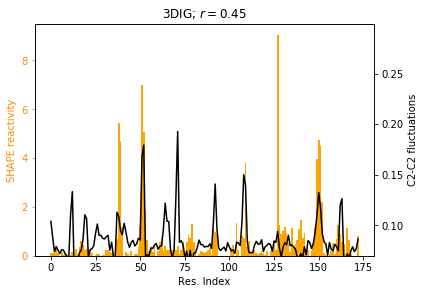

In [14]:
from scipy.stats.stats import pearsonr     
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots()
ax1.bar(np.arange(shape_3DIG.shape[0]-1),shape_3DIG[:-1],1,label='SHAPE',color='orange')
ax1.set_xlabel('Res. Index')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('SHAPE reactivity', color='darkorange')
ax1.tick_params('y', colors='darkorange')

ax2 = ax1.twinx()

ax2.plot(fluc_C2_3DIG[:-1],label='ENM',c='k')
ax2.set_ylabel('C2-C2 fluctuations', color='k')
ax2.tick_params('y', colors='k')
ax2.set_ylim(0.07,0.299)
fig.tight_layout()
plt.title('3DIG; $r=%.2f$'%pearsonr(shape_3DIG[:-1],fluc_C2_3DIG[:-1])[0])
plt.savefig('ENM-SHAPE_3DIG.pdf',bbox_inches="tight")

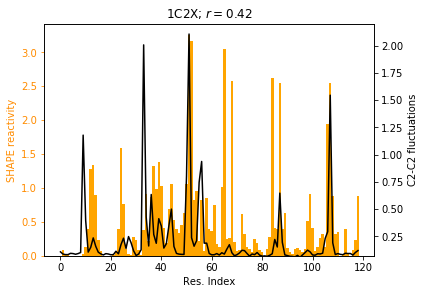

In [15]:
fig, ax1 = plt.subplots()
ax1.bar(np.arange(shape_1C2X.shape[0]-1),shape_1C2X[:-1],1,label='SHAPE',color='orange')
ax1.set_xlabel('Res. Index')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('SHAPE reactivity', color='darkorange')
ax1.tick_params('y', colors='darkorange')

ax2 = ax1.twinx()

ax2.plot(fluc_C2_1C2X[:],label='ENM',c='k')
ax2.set_ylabel('C2-C2 fluctuations', color='k')
ax2.tick_params('y', colors='k')
ax2.set_ylim(0.07,2.2)
fig.tight_layout()
plt.title('1C2X; $r=%.2f$'%pearsonr(shape_1C2X[:-1],fluc_C2_1C2X[:])[0])
plt.savefig('ENM-SHAPE_1C2X.pdf',bbox_inches="tight")